# US Home Price casestudy

This Notebook contains a casestudy on US Home Prices and key factors that influence home prices.


we will be collecting publicly available data, clean the data, build a final dataset, perform EDA & Data Visualization and finally build a data science model

## 1. Data Collection


* We will not be using ready made datasets from kaggle, but I have chosen FRED (Federal Reserve Economic Data) as a reliable public data source.
* We will be using some key factors like GDP, Mortgage, Unemployment rate, Population growth etc to carry out case study and model building
  

In [1]:
# installing fred api : 
# !pip install fredapi

In [2]:
# # Run It only once

# import os
# import pandas as pd
# from fredapi import Fred
# from dotenv import load_dotenv

# load_dotenv()
# FRED_API_KEY = os.getenv("FRED_API_KEY")

# fred = Fred(api_key=FRED_API_KEY)

# data_dir = "data"
# if not os.path.exists(data_dir):
#     os.makedirs(data_dir)

# series_list = [
#     "CPIAUCSL",  # Consumer Price Index for All Urban Consumers: Seasonally Adjusted (CPI-U)
#     "CSUSHPISA",  # S&P Case-Shiller US National Home Price Index
#     "FEDFUNDS",  # Effective Federal Funds Rate
#     "GDB",  # Gross Domestic Product
#     "HOUST",  # Housing Starts
#     "MCOILWTICO",  # Crude Oil Prices (West Texas)
#     "MEHOINUSA672N",  # Median Household Income
#     "POP",  # Population in the US
#     "UNRATE"  # Unemployment Rate
# ]

# # I have included more explanation about above features in descriptions.txt

# for series in series_list:
#     data = fred.get_series(series)
#     df = data.reset_index()
#     df.columns = ["date", "value"]  
#     df.to_csv(os.path.join(data_dir,"f{series}.csv"), index=False)
#     print(f"Saved {series} to {data_dir}/{series}.csv")
#     print(df.head())  

Now we have data of required key factors. I have thought of other more key factors like crime rate, etc. but to reduce the complexity of understanding and to keep it simple, we will be continuing with these factors only.


We have total of 10 key features and 1 target feature (CSUSHPISA as the proxy for home price indication) 

## 2. Data Cleaning

In this section, we will be finalizing on how many years of data should we use to build the final dataset. and if there are any null values in the dataset, we will fill them or remove them.

In [50]:
import numpy as np
import pandas as pd
import os

cwd = os.getcwd()

data_dir = os.path.join(cwd, "data")

cpi = pd.read_csv(os.path.join(data_dir, "CPIAUCSL.csv"))
csus = pd.read_csv(os.path.join(data_dir, "CSUSHPISA.csv"))
fedfunds = pd.read_csv(os.path.join(data_dir, "FEDFUNDS.csv"))
gdp = pd.read_csv(os.path.join(data_dir, "GDB.csv"))
houst = pd.read_csv(os.path.join(data_dir, "HOUST.csv"))
mcoil = pd.read_csv(os.path.join(data_dir, "MCOILWTICO.csv"))
meho = pd.read_csv(os.path.join(data_dir, "MEHOINUSA672N.csv"))
# mort15 = pd.read_csv(os.path.join(data_dir, "MORTGAGE15US.csv"))
# mort30 = pd.read_csv(os.path.join(data_dir, "MORTGAGE30US.csv"))
pop = pd.read_csv(os.path.join(data_dir, "POP.csv"))
unrate = pd.read_csv(os.path.join(data_dir, "UNRATE.csv"))
permit = pd.read_csv(os.path.join(data_dir, "PERMIT.csv"))


print(cpi.head())
print(csus.head())
print(fedfunds.head())
print(gdp.head())
print(houst.head())
print(mcoil.head())
print(meho.head())
# print(mort15.head())
# print(mort30.head())
print(pop.head())
print(unrate.head())
print(permit.head())

         date  value
0  1947-01-01  21.48
1  1947-02-01  21.62
2  1947-03-01  22.00
3  1947-04-01  22.00
4  1947-05-01  21.95
         date  value
0  1975-01-01    NaN
1  1975-02-01    NaN
2  1975-03-01    NaN
3  1975-04-01    NaN
4  1975-05-01    NaN
         date  value
0  1954-07-01   0.80
1  1954-08-01   1.22
2  1954-09-01   1.07
3  1954-10-01   0.85
4  1954-11-01   0.83
         date    value
0  1946-01-01      NaN
1  1946-04-01      NaN
2  1946-07-01      NaN
3  1946-10-01      NaN
4  1947-01-01  232.289
         date   value
0  1959-01-01  1657.0
1  1959-02-01  1667.0
2  1959-03-01  1620.0
3  1959-04-01  1590.0
4  1959-05-01  1498.0
         date  value
0  1986-01-01  22.93
1  1986-02-01  15.46
2  1986-03-01  12.61
3  1986-04-01  12.84
4  1986-05-01  15.38
         date    value
0  1984-01-01  56780.0
1  1985-01-01  57860.0
2  1986-01-01  60010.0
3  1987-01-01  60760.0
4  1988-01-01  61210.0
         date     value
0  1952-01-01  156309.0
1  1952-02-01  156527.0
2  1952-03-01  1

<Axes: >

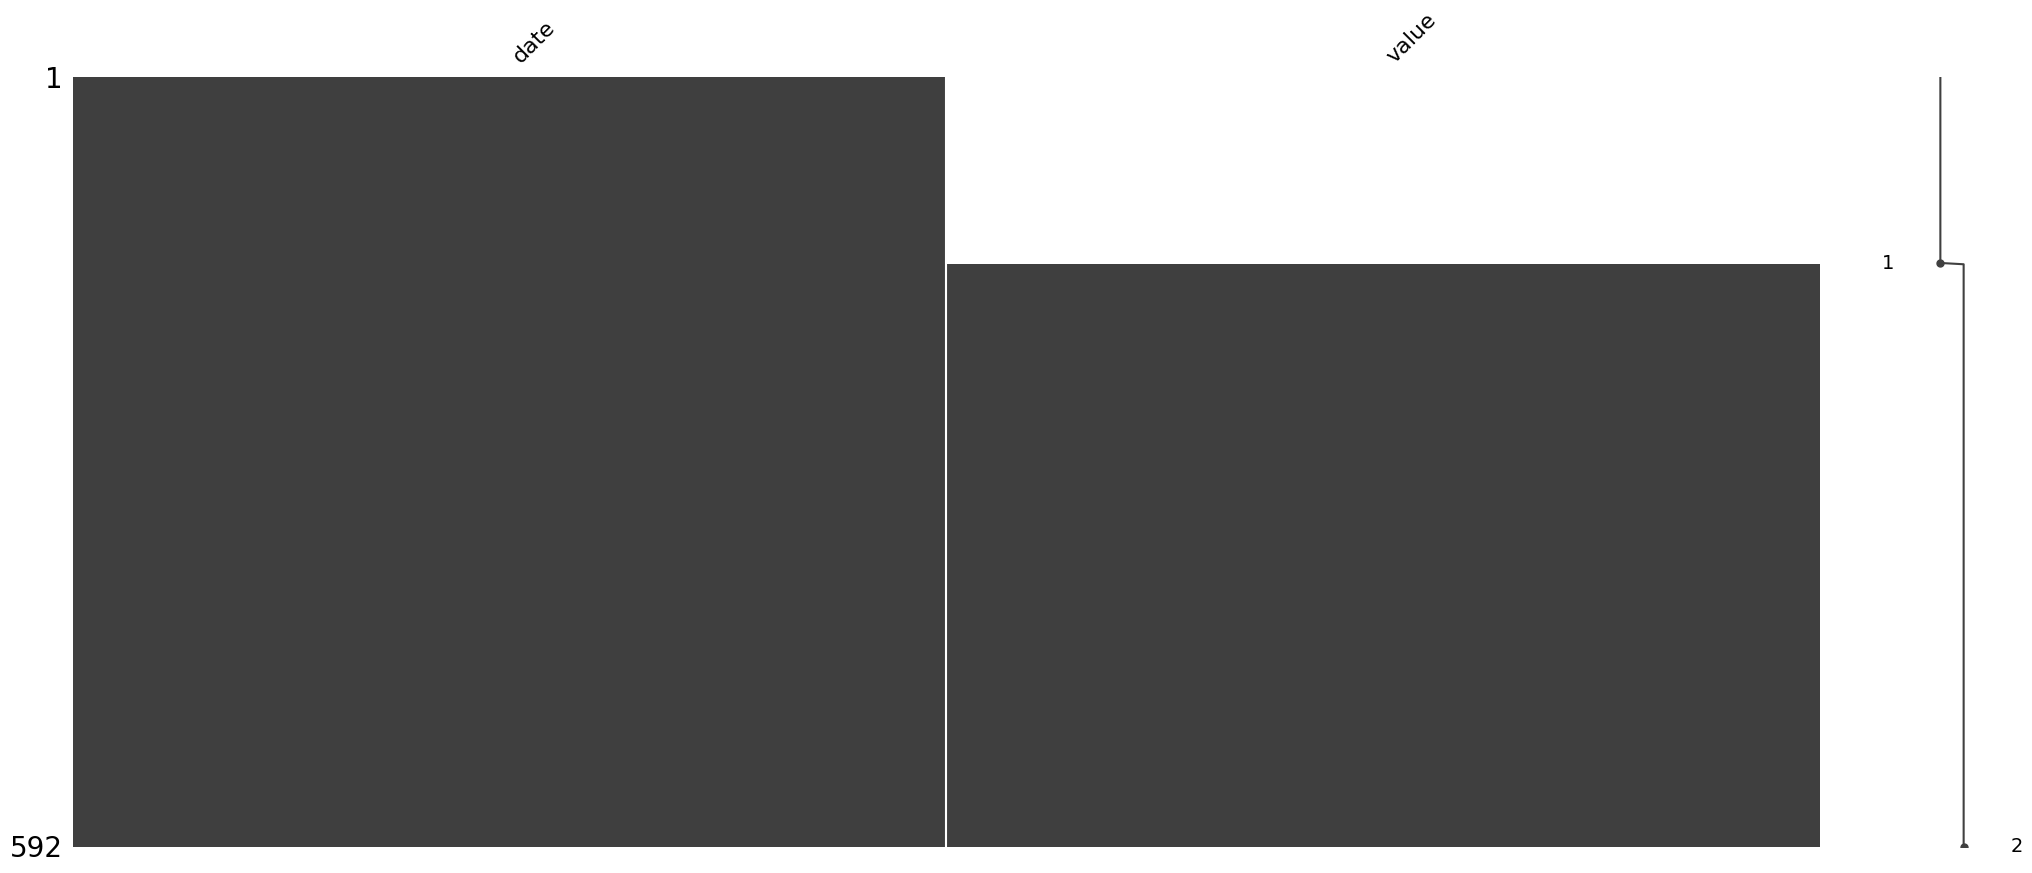

In [51]:
import missingno as mno

mno.matrix(csus)

We can see that in CSUSHPISA Data, we have some values missing. as this is our target feature, we will only continue with a range of available values.

In [52]:
missing_years = csus[csus["value"].isna()]["date"]
missing_years = pd.to_datetime(missing_years).dt.year
print("Missing years:", missing_years.unique())

Missing years: [1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986]


We are missing data from 1975 to 1986, still we have data from 1987 to 2024, which is good enough, i.e, almost 37 years

In [53]:
csus = csus.dropna()
csus.reset_index(drop=True, inplace=True)
csus

,date,value
0,1987-01-01,63.965
1,1987-02-01,64.423
2,1987-03-01,64.735
3,1987-04-01,65.131
4,1987-05-01,65.563
...,...,...
443,2023-12-01,314.443
444,2024-01-01,315.728
445,2024-02-01,317.257
446,2024-03-01,318.217


In [54]:
csus.isnull().sum()

date     0
value    0
dtype: int64

We are now left with 448 instances of data


Now we will update all other dataframes to be in this date range only.

In [55]:
cpi = cpi[(cpi["date"] >= "1987-01-01") & (cpi["date"] <= "2024-04-01")]
csus = csus[(csus["date"] >= "1987-01-01") & (csus["date"] <= "2024-04-01")]
fedfunds = fedfunds[(fedfunds["date"] >= "1987-01-01") & (fedfunds["date"] <= "2024-04-01")]
gdp = gdp[(gdp["date"] >= "1987-01-01") & (gdp["date"] <= "2024-04-01")]
houst = houst[(houst["date"] >= "1987-01-01") & (houst["date"] <= "2024-04-01")]
mcoil = mcoil[(mcoil["date"] >= "1987-01-01") & (mcoil["date"] <= "2024-04-01")]
meho = meho[(meho["date"] >= "1987-01-01") & (meho["date"] <= "2024-04-01")]
# mort15 = mort15[(mort15[date] >= 1987-01-01) & (mort15[date] <= 2024-03-01)]
# mort30 = mort30[(mort30[date] >= 1987-01-01) & (mort30[date] <= 2024-03-01)]
pop = pop[(pop["date"] >= "1987-01-01") & (pop["date"] <= "2024-04-01")]
unrate = unrate[(unrate["date"] >= "1987-01-01") & (unrate["date"] <= "2024-04-01")]

let us check whether all other dataframes have same number of values or not. and convert all the date time format of date to date only.

In [56]:
import warnings
warnings.filterwarnings('ignore') 

In [57]:
cpi["date"] = pd.to_datetime(cpi["date"], format="%Y-%m-%d")
csus["date"] = pd.to_datetime(csus["date"], format="%Y-%m-%d")
fedfunds["date"] = pd.to_datetime(fedfunds["date"], format="%Y-%m-%d")
gdp["date"] = pd.to_datetime(gdp["date"], format="%Y-%m-%d")
houst["date"] = pd.to_datetime(houst["date"], format="%Y-%m-%d")
mcoil["date"] = pd.to_datetime(mcoil["date"], format="%Y-%m-%d")
meho["date"] = pd.to_datetime(meho["date"], format="%Y-%m-%d")
# mort15["date"] = pd.to_datetime(mort15["date"], format="%Y-%m-%d")
# mort30["date"] = pd.to_datetime(mort30["date"], format="%Y-%m-%d")
pop["date"] = pd.to_datetime(pop["date"], format="%Y-%m-%d")
unrate["date"] = pd.to_datetime(unrate["date"], format="%Y-%m-%d")

In [58]:
features = [csus,cpi,fedfunds,gdp,houst,mcoil,meho,pop,unrate]

for feature in features:
    feature.reset_index(drop=True, inplace=True)
    print(f"{feature.shape}")

(448, 2)
(448, 2)
(448, 2)
(149, 2)
(448, 2)
(448, 2)
(36, 2)
(448, 2)
(448, 2)


We should be looking at gdp, meho, mort15,mort30 dataframes as they differ in our desired shape.

In [59]:
gdp.head() 

,date,value
0,1987-01-01,4863.390
1,1987-04-01,4953.137
2,1987-07-01,5030.019
3,1987-10-01,5153.399
4,1988-01-01,5197.359


we can see that we have gdp once every three month (for every quarter), our strategy here is to take slope of first month and fourth month, impute it to the missing months.

In [60]:
gdp

,date,value
0,1987-01-01,4863.390
1,1987-04-01,4953.137
2,1987-07-01,5030.019
3,1987-10-01,5153.399
4,1988-01-01,5197.359
...,...,...
144,2023-01-01,27639.287
145,2023-04-01,27869.104
146,2023-07-01,28389.359
147,2023-10-01,28740.732


In [61]:
# gdp["date"] = pd.to_datetime(gdp["date"], format="%Y-%m-%d")
df = gdp.copy()
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="MS")

df = df.reindex(date_range)

df.reset_index(inplace=True)
df.rename(columns={"index": "date"}, inplace=True)

df["value"] = df["value"].interpolate(method="linear")

# With simple linear extrapolation, I have calculated 2 more gdp values for two more months  :
# 445 2024-02-01  29234.510000
# 446 2024-03-01  29365.950000

new_data = pd.DataFrame({
    "value": [29234.51, 29365.95, 29365.95],
    "date": ["2024-02-01","2024-03-01","2024-04-01"]
}, index=[445,446,447])
new_data["date"] = pd.to_datetime(new_data["date"], format="%Y-%m-%d")

df = pd.concat([df, new_data])

print(df)



          date         value
0   1987-01-01   4863.390000
1   1987-02-01   4893.305667
2   1987-03-01   4923.221333
3   1987-04-01   4953.137000
4   1987-05-01   4978.764333
..         ...           ...
443 2023-12-01  28982.957333
444 2024-01-01  29104.070000
445 2024-02-01  29234.510000
446 2024-03-01  29365.950000
447 2024-04-01  29365.950000

[448 rows x 2 columns]


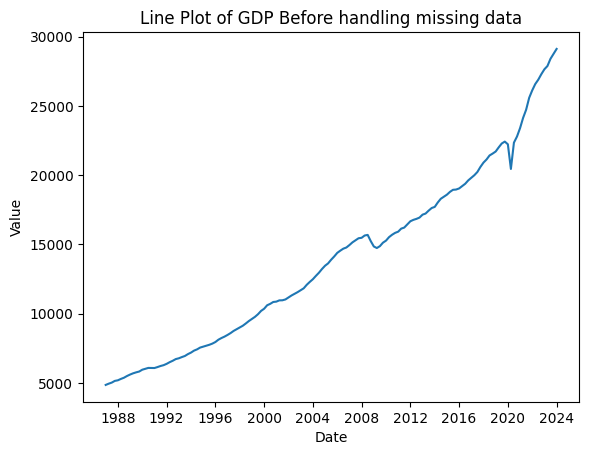

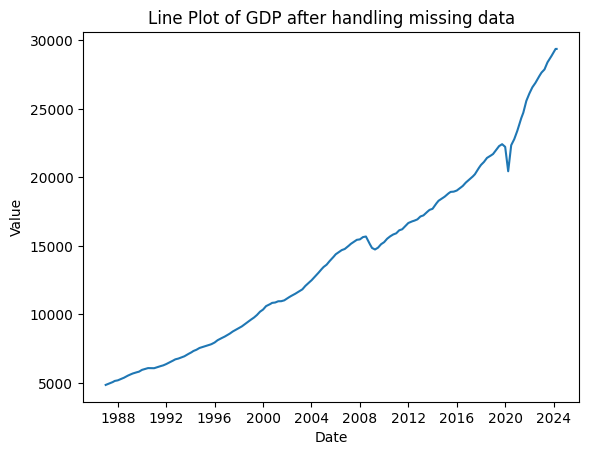

In [62]:
import matplotlib.pyplot as plt

plt.plot(gdp.date, gdp.value)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Line Plot of GDP Before handling missing data")
plt.show()

plt.plot(df.date, df.value)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Line Plot of GDP after handling missing data")
plt.show()



In [63]:
gdp = df.copy()
gdp

,date,value
0,1987-01-01,4863.390000
1,1987-02-01,4893.305667
2,1987-03-01,4923.221333
3,1987-04-01,4953.137000
4,1987-05-01,4978.764333
...,...,...
443,2023-12-01,28982.957333
444,2024-01-01,29104.070000
445,2024-02-01,29234.510000
446,2024-03-01,29365.950000


In [64]:
gdp.shape

(448, 2)

Literally can spot no difference ! GDP has been handled. Onto meho, mort15, mort30 now.

In [65]:
meho.date.min()

Timestamp('1987-01-01 00:00:00')

In [66]:
meho.date.max()

Timestamp('2022-01-01 00:00:00')

In [67]:
meho

,date,value
0,1987-01-01,60760.0
1,1988-01-01,61210.0
2,1989-01-01,62260.0
3,1990-01-01,61500.0
4,1991-01-01,59710.0
5,1992-01-01,59210.0
6,1993-01-01,58920.0
7,1994-01-01,59550.0
8,1995-01-01,61440.0
9,1996-01-01,62350.0


We have only one median income value per year.

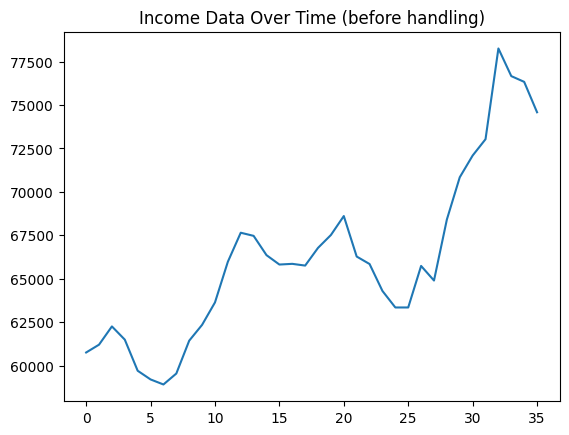

In [68]:
meho["value"].plot(title="Income Data Over Time (before handling)")
plt.show()

In [69]:
meho.columns

Index(['date', 'value'], dtype='object')

In [70]:
temp = meho.copy()
temp["date"] = pd.to_datetime(meho["date"])
temp.reset_index(drop=True, inplace=True)
temp.set_index("date", inplace=True)
temp_resampled = temp.resample("MS").mean()
temp_interpolated = temp_resampled.interpolate(method="linear")
print(temp_interpolated)
# meho = meho_interpolated.copy()
# meho.reset_index(inplace=True)  
# meho

                   value
date                    
1987-01-01  60760.000000
1987-02-01  60797.500000
1987-03-01  60835.000000
1987-04-01  60872.500000
1987-05-01  60910.000000
...                  ...
2021-09-01  75163.333333
2021-10-01  75017.500000
2021-11-01  74871.666667
2021-12-01  74725.833333
2022-01-01  74580.000000

[421 rows x 1 columns]


<Axes: xlabel='date'>

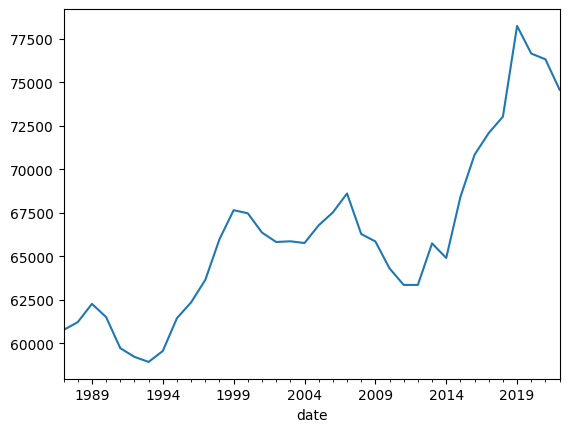

In [71]:
temp_interpolated['value'].plot()

In [72]:
last_date = '2024-04-01'
last_date = pd.to_datetime(last_date)
extended_index = pd.date_range(start=temp_interpolated.index.min(), end=last_date, freq='MS')
df_extended = temp_interpolated.reindex(extended_index)
df_interpolated = df_extended.interpolate(method='linear')
print(df_interpolated)

              value
1987-01-01  60760.0
1987-02-01  60797.5
1987-03-01  60835.0
1987-04-01  60872.5
1987-05-01  60910.0
...             ...
2023-12-01  74580.0
2024-01-01  74580.0
2024-02-01  74580.0
2024-03-01  74580.0
2024-04-01  74580.0

[448 rows x 1 columns]


<Axes: title={'center': 'Income Data Over Time after handling'}>

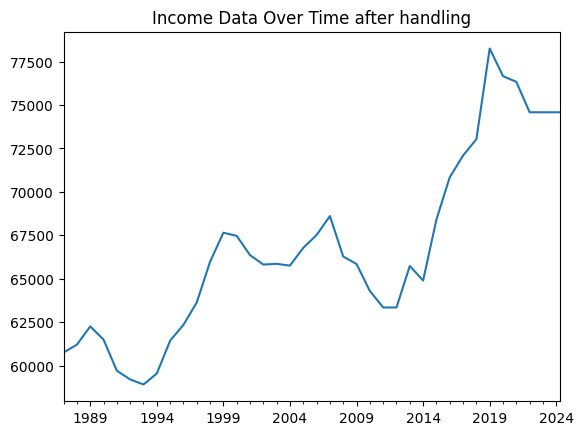

In [73]:
df_interpolated['value'].plot(title="Income Data Over Time after handling")

In [74]:
df_interpolated = df.reset_index()
df_interpolated.rename(columns={'index': 'date'}, inplace=True)

In [75]:
print(df_interpolated)

df_interpolated = df_interpolated.iloc[:, 1:] 
df_interpolated

    date       date         value
0      0 1987-01-01   4863.390000
1      1 1987-02-01   4893.305667
2      2 1987-03-01   4923.221333
3      3 1987-04-01   4953.137000
4      4 1987-05-01   4978.764333
..   ...        ...           ...
443  443 2023-12-01  28982.957333
444  444 2024-01-01  29104.070000
445  445 2024-02-01  29234.510000
446  446 2024-03-01  29365.950000
447  447 2024-04-01  29365.950000

[448 rows x 3 columns]


,date,value
0,1987-01-01,4863.390000
1,1987-02-01,4893.305667
2,1987-03-01,4923.221333
3,1987-04-01,4953.137000
4,1987-05-01,4978.764333
...,...,...
443,2023-12-01,28982.957333
444,2024-01-01,29104.070000
445,2024-02-01,29234.510000
446,2024-03-01,29365.950000


In [76]:
df_interpolated = df_interpolated[:-1]
df_interpolated

,date,value
0,1987-01-01,4863.390000
1,1987-02-01,4893.305667
2,1987-03-01,4923.221333
3,1987-04-01,4953.137000
4,1987-05-01,4978.764333
...,...,...
442,2023-11-01,28861.844667
443,2023-12-01,28982.957333
444,2024-01-01,29104.070000
445,2024-02-01,29234.510000


In [77]:
meho = df_interpolated.copy()
meho

,date,value
0,1987-01-01,4863.390000
1,1987-02-01,4893.305667
2,1987-03-01,4923.221333
3,1987-04-01,4953.137000
4,1987-05-01,4978.764333
...,...,...
442,2023-11-01,28861.844667
443,2023-12-01,28982.957333
444,2024-01-01,29104.070000
445,2024-02-01,29234.510000


In [78]:
new_data = {'date': pd.to_datetime('2024-04-01'), 'value': 29365.95}
new_data_df = pd.DataFrame([new_data])
meho = pd.concat([meho, new_data_df], ignore_index=True)
meho = meho.sort_values(by='date')
meho

,date,value
0,1987-01-01,4863.390000
1,1987-02-01,4893.305667
2,1987-03-01,4923.221333
3,1987-04-01,4953.137000
4,1987-05-01,4978.764333
...,...,...
443,2023-12-01,28982.957333
444,2024-01-01,29104.070000
445,2024-02-01,29234.510000
446,2024-03-01,29365.950000


Median Income is also handled. Now need to handle Mortgage interest rates

Scaling down 1900+ data points to some 500 doesn"t sound like a good Idea, so let us not use mortgage interest rates and I have found a new key factor based on PERMIT : "Number of new housing units authorized by building permits."


In [79]:
permit

,date,value
0,1987-01-01,1690.0
1,1987-02-01,1689.0
2,1987-03-01,1704.0
3,1987-04-01,1601.0
4,1987-05-01,1500.0
...,...,...
442,2023-11-01,1508.0
443,2023-12-01,1530.0
444,2024-01-01,1508.0
445,2024-02-01,1563.0


In [80]:
permit.loc[len(permit)] = ['2024-04-01', 1485.0]
permit['date'] = pd.to_datetime(permit['date'])
print(permit.tail())

          date   value
443 2023-12-01  1530.0
444 2024-01-01  1508.0
445 2024-02-01  1563.0
446 2024-03-01  1485.0
447 2024-04-01  1485.0


In [81]:
permit = permit.copy()

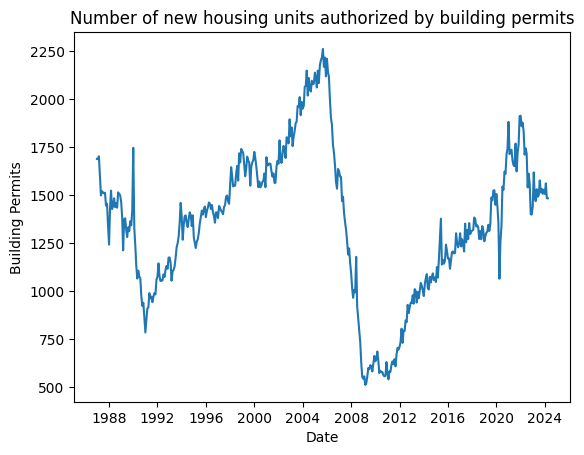

In [82]:
permit_dup = permit.copy()
# permit_dup.columns
permit_dup["date"] = pd.to_datetime(permit_dup["date"], format="%Y-%m-%d")
plt.plot(permit_dup.date, permit_dup["value"])
plt.xlabel("Date")
plt.ylabel("Building Permits")
plt.title("Number of new housing units authorized by building permits")
plt.show()

## Building Final Dataset

we need to build a final dataset from all the features now.

In [83]:
from datetime import datetime

cpi.rename(columns={"value": "CPI"}, inplace=True)
csus.rename(columns={"value": "Home Price Index"}, inplace=True)
fedfunds.rename(columns={"value": "Federal Funds Rate"}, inplace=True)
gdp.rename(columns={"value": "GDP"}, inplace=True)
houst.rename(columns={"value": "Housing Starts"}, inplace=True)
mcoil.rename(columns={"value": "Crude Oil Prices"}, inplace=True)
meho.rename(columns={"value": "Median Household Income"}, inplace=True)
pop.rename(columns={"value": "Population"}, inplace=True)
unrate.rename(columns={"value": "Unemployment Rate"}, inplace=True)
permit.rename(columns={"value": "Building Permits"}, inplace=True)

In [84]:
features = [csus,cpi,fedfunds,gdp,houst,mcoil,meho,pop,unrate,permit]

for feature in features:
    # feature.reset_index(drop=True, inplace=True)
    print(f"{feature.shape}")

(448, 2)
(448, 2)
(448, 2)
(448, 2)
(448, 2)
(448, 2)
(448, 2)
(448, 2)
(448, 2)
(448, 2)


All dataframes have same shape

In [85]:
for df in [cpi, csus, fedfunds, gdp, houst, mcoil, meho, pop, unrate, permit]:
    df['date'] = pd.to_datetime(df['date'])

cpi.set_index('date', inplace=True)
csus.set_index('date', inplace=True)
fedfunds.set_index('date', inplace=True)
gdp.set_index('date', inplace=True)
houst.set_index('date', inplace=True)
mcoil.set_index('date', inplace=True)
meho.set_index('date', inplace=True)
pop.set_index('date', inplace=True)
unrate.set_index('date', inplace=True)
permit.set_index('date', inplace=True)

merged_df = pd.concat([cpi, csus, fedfunds, gdp, houst, mcoil, meho, pop, unrate, permit], axis=1)

merged_df.reset_index(inplace=True)

print(merged_df.head())

        date    CPI  Home Price Index  Federal Funds Rate          GDP  \
0 1987-01-01  111.4            63.965                6.43  4863.390000   
1 1987-02-01  111.8            64.423                6.10  4893.305667   
2 1987-03-01  112.2            64.735                6.13  4923.221333   
3 1987-04-01  112.7            65.131                6.37  4953.137000   
4 1987-05-01  113.0            65.563                6.85  4978.764333   

   Housing Starts  Crude Oil Prices  Median Household Income  Population  \
0          1774.0             18.65              4863.390000    241784.0   
1          1784.0             17.75              4893.305667    241930.0   
2          1726.0             18.30              4923.221333    242079.0   
3          1614.0             18.68              4953.137000    242252.0   
4          1628.0             19.44              4978.764333    242423.0   

   Unemployment Rate  Building Permits  
0                6.6            1690.0  
1               

<Axes: >

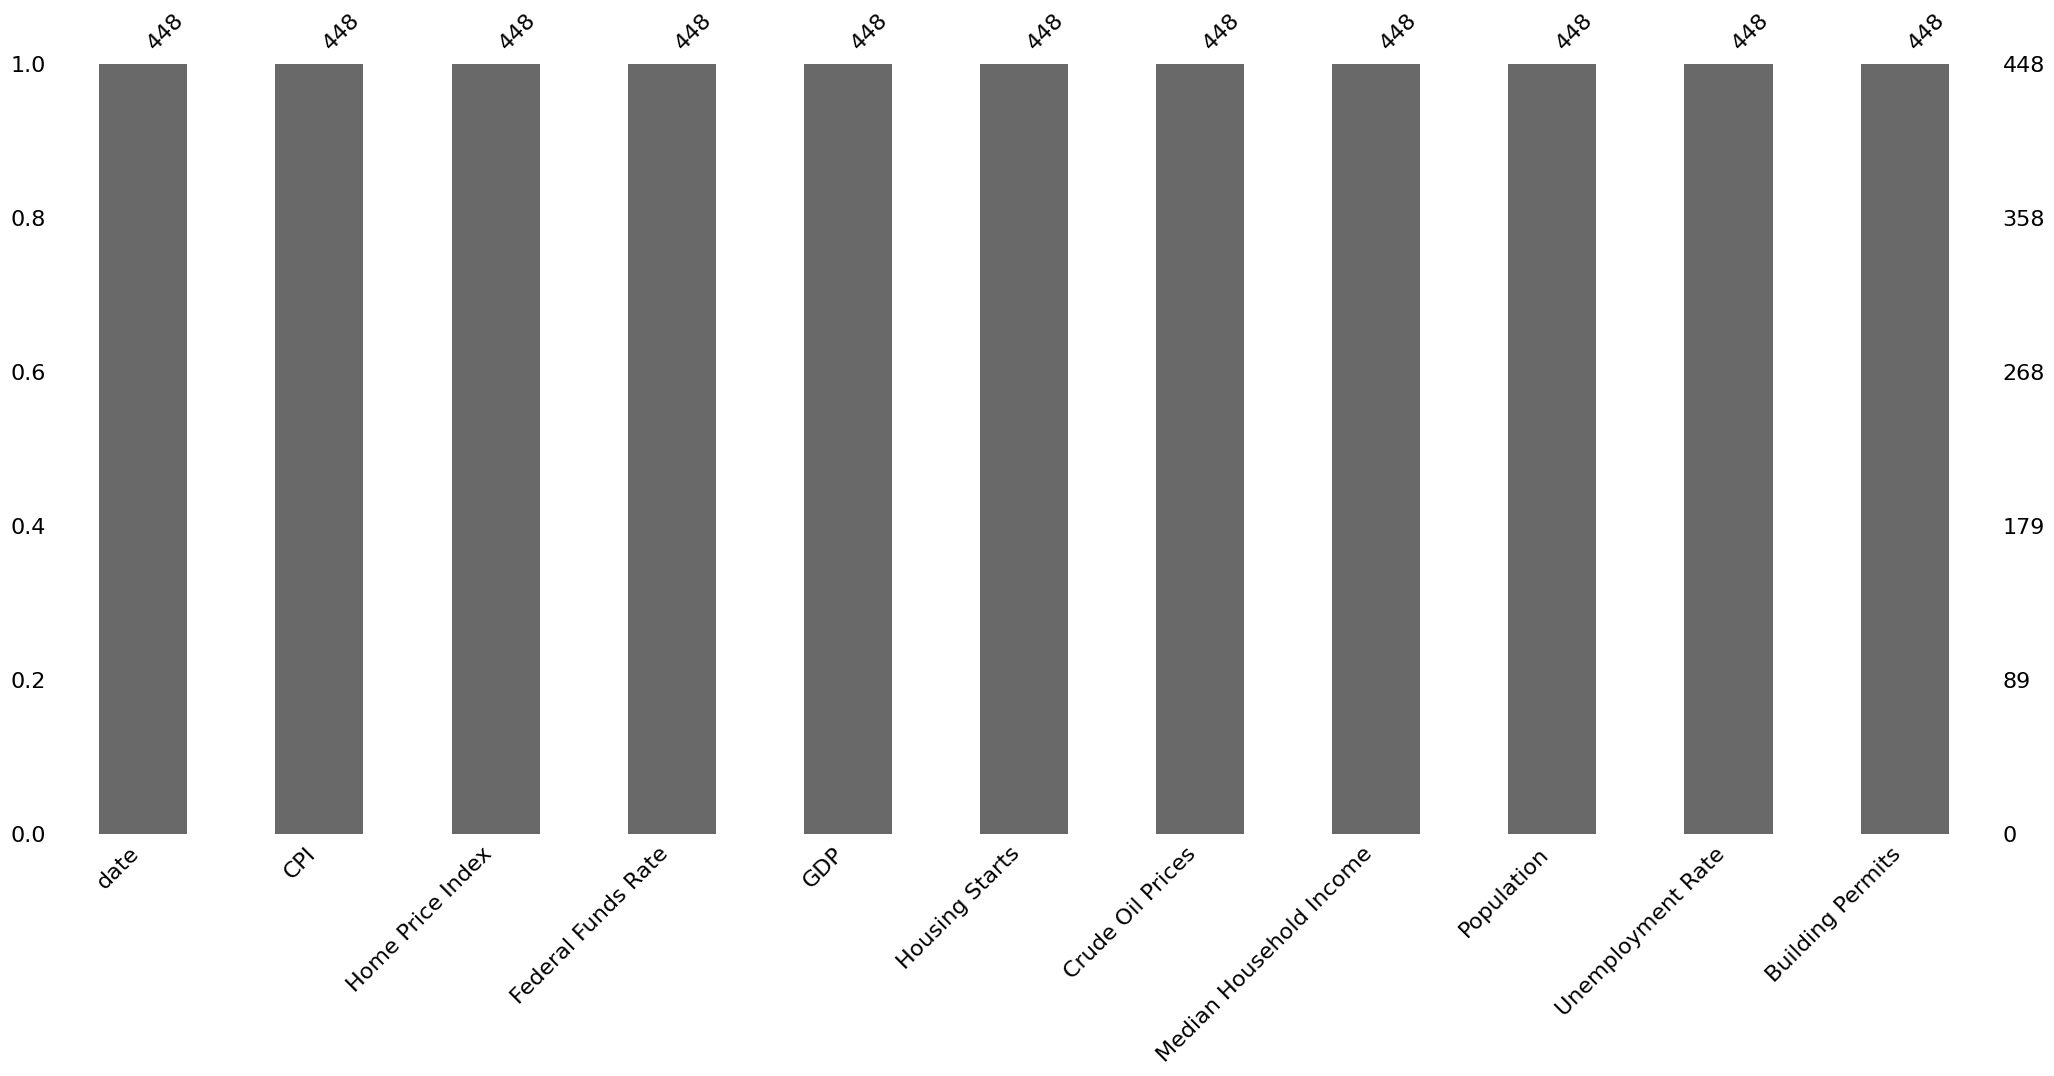

In [86]:
mno.bar(merged_df)

Dataset is done. Lets save it as final dataset.

In [87]:
merged_df.to_csv(os.path.join(data_dir,"Final.csv"), index=False)

## Model Building

#### Our Target is Home Price Index. Hence we have a supervised learning task where we will use Regression.

In [88]:
df = merged_df.copy()
df

,date,CPI,Home Price Index,Federal Funds Rate,GDP,Housing Starts,Crude Oil Prices,Median Household Income,Population,Unemployment Rate,Building Permits
0,1987-01-01,111.400,63.965,6.43,4863.390000,1774.0,18.65,4863.390000,241784.000,6.6,1690.0
1,1987-02-01,111.800,64.423,6.10,4893.305667,1784.0,17.75,4893.305667,241930.000,6.6,1689.0
2,1987-03-01,112.200,64.735,6.13,4923.221333,1726.0,18.30,4923.221333,242079.000,6.6,1704.0
3,1987-04-01,112.700,65.131,6.37,4953.137000,1614.0,18.68,4953.137000,242252.000,6.3,1601.0
4,1987-05-01,113.000,65.563,6.85,4978.764333,1628.0,19.44,4978.764333,242423.000,6.3,1500.0
...,...,...,...,...,...,...,...,...,...,...,...
443,2023-12-01,308.742,314.443,5.33,28982.957333,1568.0,71.90,28982.957333,336000.763,3.7,1530.0
444,2024-01-01,309.685,315.728,5.33,29104.070000,1376.0,74.15,29104.070000,336139.132,3.7,1508.0
445,2024-02-01,311.054,317.257,5.33,29234.510000,1546.0,77.25,29234.510000,336249.709,3.9,1563.0
446,2024-03-01,312.230,318.217,5.33,29365.950000,1299.0,81.28,29365.950000,336361.391,3.8,1485.0


In [89]:
# We don't need date now, so drop it 
df = df.drop(["date"],axis = 1)
df

,CPI,Home Price Index,Federal Funds Rate,GDP,Housing Starts,Crude Oil Prices,Median Household Income,Population,Unemployment Rate,Building Permits
0,111.400,63.965,6.43,4863.390000,1774.0,18.65,4863.390000,241784.000,6.6,1690.0
1,111.800,64.423,6.10,4893.305667,1784.0,17.75,4893.305667,241930.000,6.6,1689.0
2,112.200,64.735,6.13,4923.221333,1726.0,18.30,4923.221333,242079.000,6.6,1704.0
3,112.700,65.131,6.37,4953.137000,1614.0,18.68,4953.137000,242252.000,6.3,1601.0
4,113.000,65.563,6.85,4978.764333,1628.0,19.44,4978.764333,242423.000,6.3,1500.0
...,...,...,...,...,...,...,...,...,...,...
443,308.742,314.443,5.33,28982.957333,1568.0,71.90,28982.957333,336000.763,3.7,1530.0
444,309.685,315.728,5.33,29104.070000,1376.0,74.15,29104.070000,336139.132,3.7,1508.0
445,311.054,317.257,5.33,29234.510000,1546.0,77.25,29234.510000,336249.709,3.9,1563.0
446,312.230,318.217,5.33,29365.950000,1299.0,81.28,29365.950000,336361.391,3.8,1485.0


In [90]:
df.columns

Index(['CPI', 'Home Price Index', 'Federal Funds Rate', 'GDP',
       'Housing Starts', 'Crude Oil Prices', 'Median Household Income',
       'Population', 'Unemployment Rate', 'Building Permits'],
      dtype='object')

In [91]:
from sklearn.model_selection import train_test_split
X = df.drop(['Home Price Index'],axis = 1)
y = df['Home Price Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Linear Regression
Mean Squared Error: 75.23006043381967
R^2 Score: 0.9862800353887335


In [93]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Decision Tree Regressor")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Decision Tree Regressor
Mean Squared Error: 2.35252667777777
R^2 Score: 0.9995709616265088


In [94]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Random Forest Regressor")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Random Forest Regressor
Mean Squared Error: 0.9767143117788343
R^2 Score: 0.9998218732549775


In [95]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

print("Gradient Boosting Regressor")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Gradient Boosting Regressor
Mean Squared Error: 1.3295277485038506
R^2 Score: 0.9997575294562575


### Random Forest Regressor is the best model with minimum MSE and High R Squared Score.

In [97]:
# Lets test random forest model on a sample data : 
sample_test_case = [[260.0,  # CPI
                     0.05,   # Federal Funds Rate
                     21000.0,  # GDP (in billions)
                     1200.0,  # Housing Starts (in thousands)
                     70.0,   # Crude Oil Prices (in USD per barrel)
                     68000.0,  # Median Household Income (in USD)
                     330000.0,  # Population (in thousands)
                     0.05,   # Unemployment Rate
                     1300.0]]  # Building Permits (in thousands)
print(rf.predict(sample_test_case))

[237.89926]


For the given input values, the Home Price Index (HPI) is **237.89926**, indicating a **137.90%** increase since the base period (January 2000, HPI = 100). This means home prices are **2.379 times** higher than the base value.


Ex. If a house costed **100,000 USD** in Jan 2000, It would cost **237,900 USD** for these given input values. 


### Lets save the model to pickle file.

In [99]:
import pickle

with open("rfr.pkl", "wb") as file:
    pickle.dump(rf, file)

In [100]:
# Loading the model from the file
import pickle

with open("rfr.pkl", "rb") as file:
    loaded_rf = pickle.load(file)

predictions = loaded_rf.predict(sample_test_case)
print(predictions)

[237.89926]
